In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

Import Test and Train CSVs    

In [36]:
ames_test = pd.read_csv('../datasets/ames3_test_cln.csv')

In [37]:
ames_test.head()

,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold
0,9,0,1910.0,1,0,60,112,0,0,0,4,2006
1,10,0,1977.0,2,170,0,0,0,0,0,8,2006
2,7,1,2006.0,2,100,24,0,0,0,0,9,2006
3,5,0,1935.0,2,0,0,184,0,0,0,7,2007
4,6,2,1963.0,2,0,76,0,0,185,0,7,2009


In [38]:
ames = pd.read_csv('../datasets/ames_3_train_clean.csv')
ames.drop(columns = ['Unnamed: 0'], inplace = True)

In [39]:
ames.head()

,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,saleprice,total_sf
0,6,0,1976.0,2.0,0,44,0,0,0,0,3,2010,130500,2204.0
1,8,1,1997.0,2.0,0,74,0,0,0,0,4,2009,220000,3035.0
2,5,0,1953.0,1.0,0,52,0,0,0,0,1,2010,109000,2114.0
3,7,0,2007.0,2.0,100,0,0,0,0,0,4,2010,174000,1828.0
4,6,0,1957.0,2.0,0,59,0,0,0,0,3,2010,138500,2121.0


In [40]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   totrms_abvgrd   878 non-null    int64  
 1   fireplaces      878 non-null    int64  
 2   garage_yr_blt   878 non-null    float64
 3   garage_cars     878 non-null    int64  
 4   wood_deck_sf    878 non-null    int64  
 5   open_porch_sf   878 non-null    int64  
 6   enclosed_porch  878 non-null    int64  
 7   3ssn_porch      878 non-null    int64  
 8   screen_porch    878 non-null    int64  
 9   misc_val        878 non-null    int64  
 10  mo_sold         878 non-null    int64  
 11  yr_sold         878 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 89.2 KB


In [41]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   totrms_abvgrd   2051 non-null   int64  
 1   fireplaces      2051 non-null   int64  
 2   garage_yr_blt   2051 non-null   float64
 3   garage_cars     2051 non-null   float64
 4   wood_deck_sf    2051 non-null   int64  
 5   open_porch_sf   2051 non-null   int64  
 6   enclosed_porch  2051 non-null   int64  
 7   3ssn_porch      2051 non-null   int64  
 8   screen_porch    2051 non-null   int64  
 9   misc_val        2051 non-null   int64  
 10  mo_sold         2051 non-null   int64  
 11  yr_sold         2051 non-null   int64  
 12  saleprice       2051 non-null   int64  
 13  total_sf        2051 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 224.5 KB


### Function Dock

# Running initial correlation on saleprice


In [44]:
ames_corr = ames.corr()
len(ames_corr.columns)

14

In [45]:
sale_corr = ames_corr['saleprice'].round(2)
sale_corr

totrms_abvgrd     0.50
fireplaces        0.47
garage_yr_blt     0.52
garage_cars       0.65
wood_deck_sf      0.33
open_porch_sf     0.33
enclosed_porch   -0.14
3ssn_porch        0.05
screen_porch      0.13
misc_val         -0.01
mo_sold           0.03
yr_sold          -0.02
saleprice         1.00
total_sf          0.78
Name: saleprice, dtype: float64

#### list of features that have greater than .40 

In [46]:
corr_list = []
count = 0
for item in sale_corr:
    if item < .40:
        corr_list.append(sale_corr.index[count])
        count = count + 1

In [47]:
corr_list

['totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch']

In [48]:
len(corr_list)

8

# Dropping all columns that have less than .4 initial correlation

In [49]:
def column_dropper(df, column_list):
    drop_list = []
    for item in df.columns:
        if item in column_list:
            drop_list.append(item)
    df.drop(columns = drop_list, inplace = True)
    

In [50]:
column_dropper(ames, corr_list)

In [51]:
ames.head()

,screen_porch,misc_val,mo_sold,yr_sold,saleprice,total_sf
0,0,0,3,2010,130500,2204.0
1,0,0,4,2009,220000,3035.0
2,0,0,1,2010,109000,2114.0
3,0,0,4,2010,174000,1828.0
4,0,0,3,2010,138500,2121.0


In [52]:
ames.shape

(2051, 6)

In [53]:
ames.corr()

,screen_porch,misc_val,mo_sold,yr_sold,saleprice,total_sf
screen_porch,1.000000,0.007122,0.029329,-0.017624,0.134581,0.105061
misc_val,0.007122,1.000000,0.019483,0.017269,-0.007375,0.139871
mo_sold,0.029329,0.019483,1.000000,-0.147494,0.032735,0.032550
yr_sold,-0.017624,0.017269,-0.147494,1.000000,-0.015203,-0.012130
saleprice,0.134581,-0.007375,0.032735,-0.015203,1.000000,0.778921
total_sf,0.105061,0.139871,0.032550,-0.012130,0.778921,1.000000


''

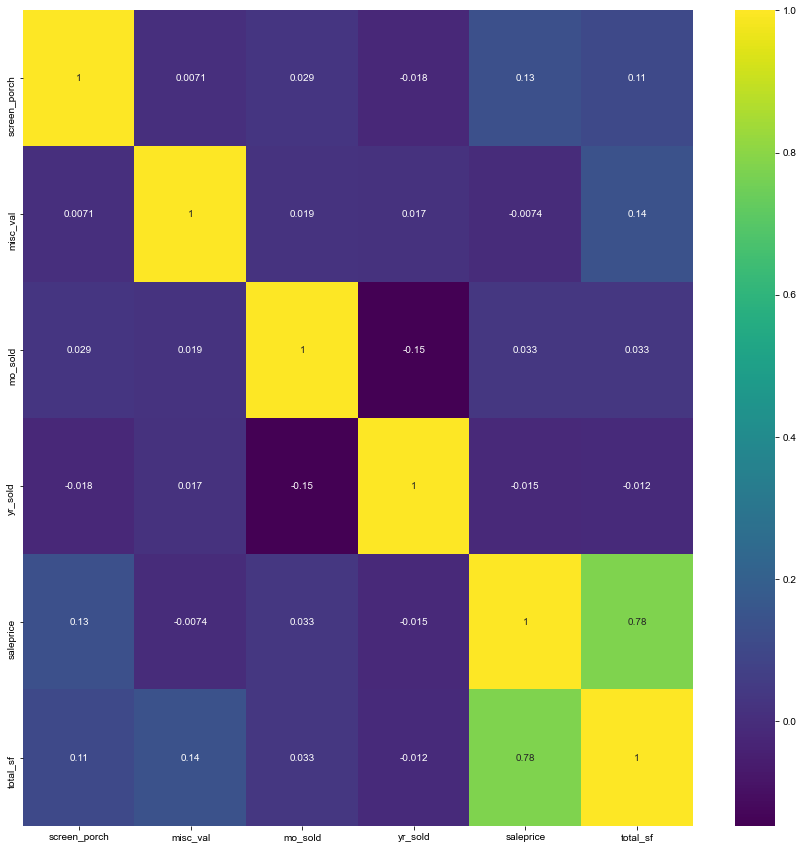

In [54]:
plt.figure(figsize = (15, 15))
sns.heatmap(ames.corr(), annot = True, cmap = 'viridis' )
sns.set(font_scale=1)
;

In [55]:
ames.corr().columns

Index(['screen_porch', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice',
       'total_sf'],
      dtype='object')

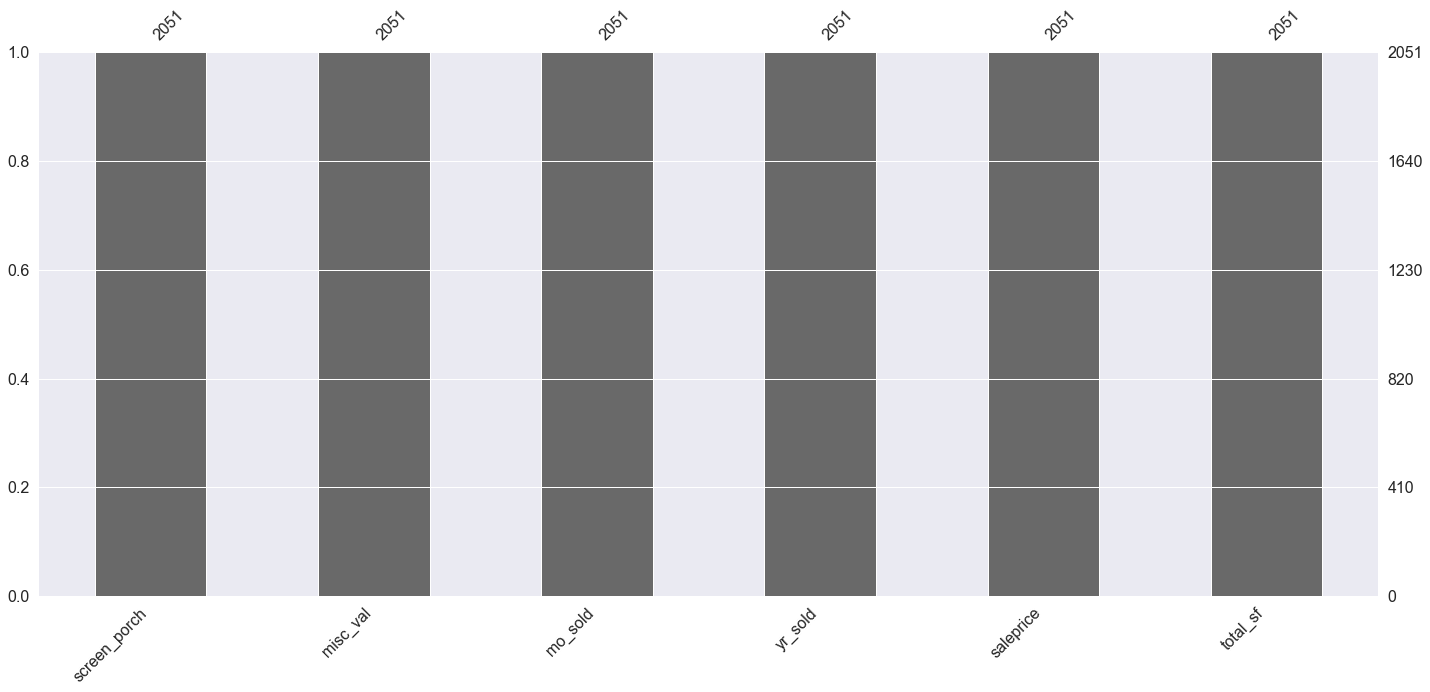

In [56]:
msno.bar(ames.iloc[:, :20])

delete_columns

* [X] garage_area. Garage area and cars is highly correlated. Keeping cars and dropping area because I think cars value is marketed more to home buyers and likely corresponds to area. 
* [X] pool_area. there are only 9 pools. I'm taking all pool columns out. 
* [X] pool_qc. see above
* [X] misc_feature. features are too vague or rare to be categorized. 
* [X] garage_cond. nearly all values are average
* [X] garage_qual. nearly all values are average and nearly identical to garage_cond
* [X] fence. too many unknown values
* [X] fireplace_qu because most values are null or of fair or good quality. There's already a column for indicating existence of fireplace.    
* [X] low_qual_fin_sf. nearly all values are 0
* [X] 2nd_flr_sf is mostly zero values 
* [X] roof_style. gable 1619 all other 5 columns = 434
* [X] roof matl. 2025 values are same compShg
* [X] exterior_2nd because it is identical to exterior_1st.
* [X] remove mas_vnr_area because most values are zero
* [X] remove exter_qual because most values are good to average. 
* [X] remove exter_cond because most values are good to average. 
* [X] remove basement_qual because most values are good to average. 
* [X] remove basement_cond because nearly all values are average. 
* [X] remove bsmt_exposure because more than half the values have no exposure and the ones that do have either minimum exposure or are of average condition. 
* [X] bsmtfin_type_2 seems to be mostly unfinished.
* [X] by deaulf I would then remove bsmtfin_sf_2
* [X] bsmtfin_sf_1 has mostly zero values. 
* [X] bsmt_unf_sf has very few actual values
* [X] total_bsmt_sf has very few actual values
* [X] 'alley' column because vast majority are missing values and it is not that important.
* [X] lot_shape (1295 for reg and 692 for IR1 the rest only comprise 55 and 9)
* [X] eliminate street. Only 7 gravel compared to 2044 paved. 
* [X] land_contour. 1843 for lvl. 208 for all other 3 categories combined. 
* [X] utilities. 2049 for allpub. 2 total for other 2 categories.
* [X] land slope. 1954 for Gtl and 98 for other 2. 
* [X] remove condition 2. 2025 for Norm. 26 for 7 other categories. and by default it is pointless to have a condition 1 if condition 2 does not exist so I will drop that as well.   


In [57]:
dropsies = ['garage_area', 'pool_area', 'pool_qc', 'bsmtfin_type_2', 'misc_feature', 'garage_cond', 'garage_qual', 'fence', 'fireplace_qu', 'low_qual_fin_sf', '2nd_flr_sf', 'roof_style', 'roof_matl', 'exterior_2nd', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_sf_1', 'bsmt_unf_sf', 'total_bsmt_sf', 'alley', 'lot_shape', 'street', 'land_countour', 'utilities', 'land_slope', 'condition_1', 'condition_2']

In [58]:
dropsies2 = []
for item in dropsies:
    if item in ames.columns:
        dropsies2.append(item)

In [59]:
column_dropper(ames, dropsies2)

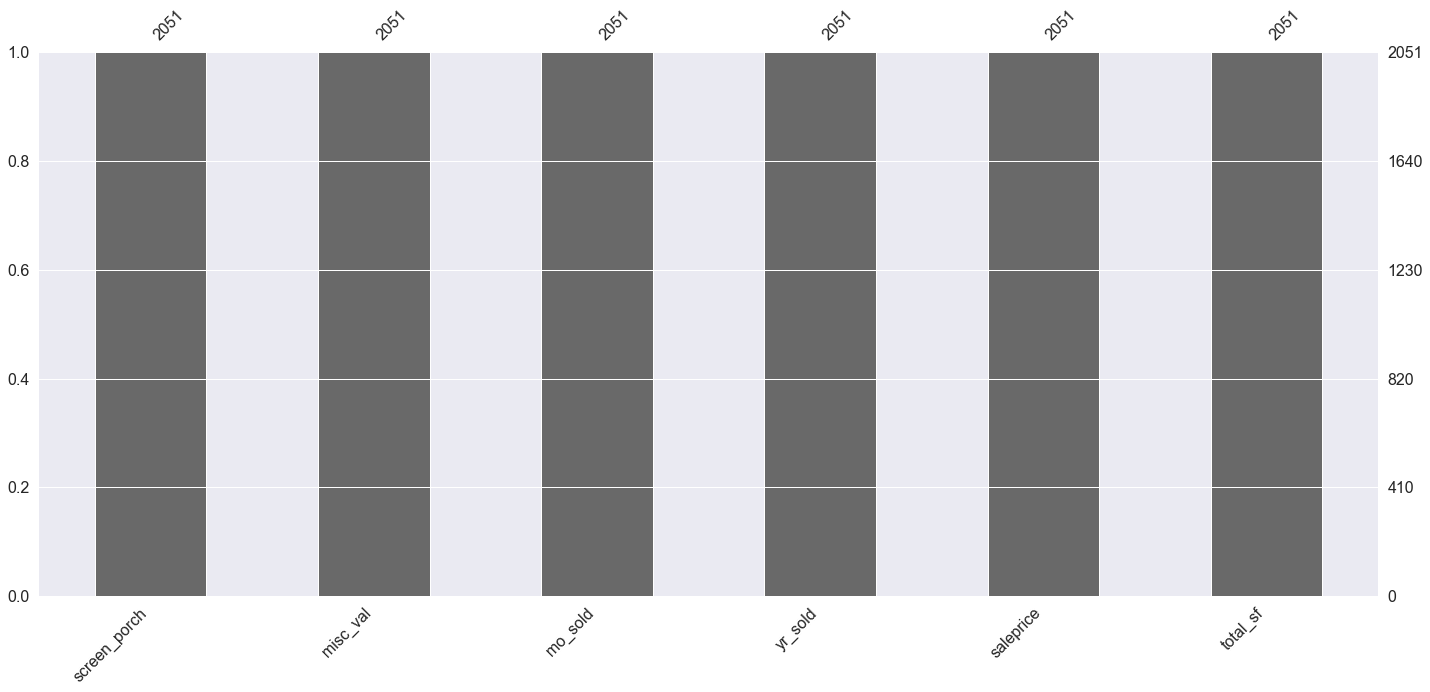

In [60]:
msno.bar(ames)

''

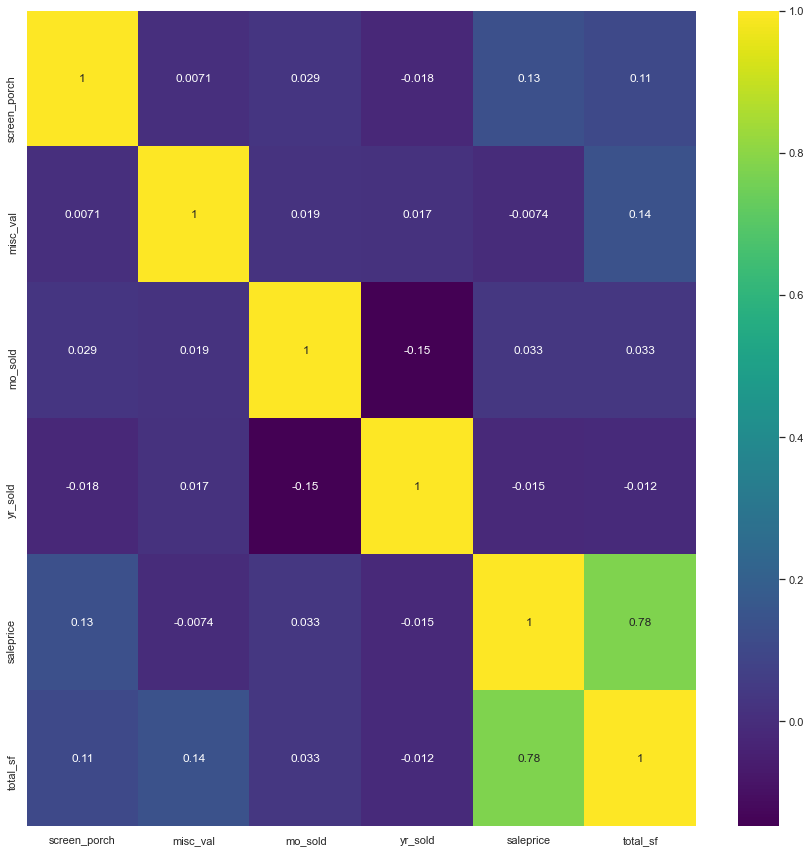

In [61]:
plt.figure(figsize = (15, 15))
sns.heatmap(ames.corr(), annot = True, cmap = 'viridis' )
sns.set(font_scale=1)
;

In [62]:
ames.head()

,screen_porch,misc_val,mo_sold,yr_sold,saleprice,total_sf
0,0,0,3,2010,130500,2204.0
1,0,0,4,2009,220000,3035.0
2,0,0,1,2010,109000,2114.0
3,0,0,4,2010,174000,1828.0
4,0,0,3,2010,138500,2121.0


In [63]:
ames.dtypes

screen_porch      int64
misc_val          int64
mo_sold           int64
yr_sold           int64
saleprice         int64
total_sf        float64
dtype: object

In [66]:
def mass_value(df):
    # function that takes in a dataframe and returns value_counts for all columns. 
    value_list = []
    for item in df.columns:
        value_list.append(item.upper())
        value_list.append(df[item].value_counts())
    return value_list

In [86]:
# prints out value_counts for entire ames dataframe
mass_value(ames)

['SCREEN_PORCH',
 0      1870
 144       9
 168       8
 180       7
 192       7
        ... 
 143       1
 198       1
 196       1
 190       1
 385       1
 Name: screen_porch, Length: 100, dtype: int64,
 'MISC_VAL',
 0        1986
 400        12
 500         8
 600         6
 2000        5
 450         5
 700         4
 2500        2
 4500        2
 3000        2
 1200        2
 80          1
 8300        1
 12500       1
 460         1
 300         1
 54          1
 3500        1
 480         1
 650         1
 800         1
 900         1
 1150        1
 1300        1
 1500        1
 6500        1
 455         1
 17000       1
 Name: misc_val, dtype: int64,
 'MO_SOLD',
 6     352
 7     303
 5     257
 4     208
 3     168
 8     167
 10    123
 9     109
 2     104
 11    103
 1      79
 12     78
 Name: mo_sold, dtype: int64,
 'YR_SOLD',
 2007    498
 2009    446
 2006    438
 2008    435
 2010    234
 Name: yr_sold, dtype: int64,
 'SALEPRICE',
 130000    25
 140000    22
 1450

#### retreiving only numerical columns
* https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

In [70]:
# This code sourced from the link above. 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ames_numeric = ames.select_dtypes(include = numerics)

In [71]:
ames_numeric.head()

,screen_porch,misc_val,mo_sold,yr_sold,saleprice,total_sf
0,0,0,3,2010,130500,2204.0
1,0,0,4,2009,220000,3035.0
2,0,0,1,2010,109000,2114.0
3,0,0,4,2010,174000,1828.0
4,0,0,3,2010,138500,2121.0


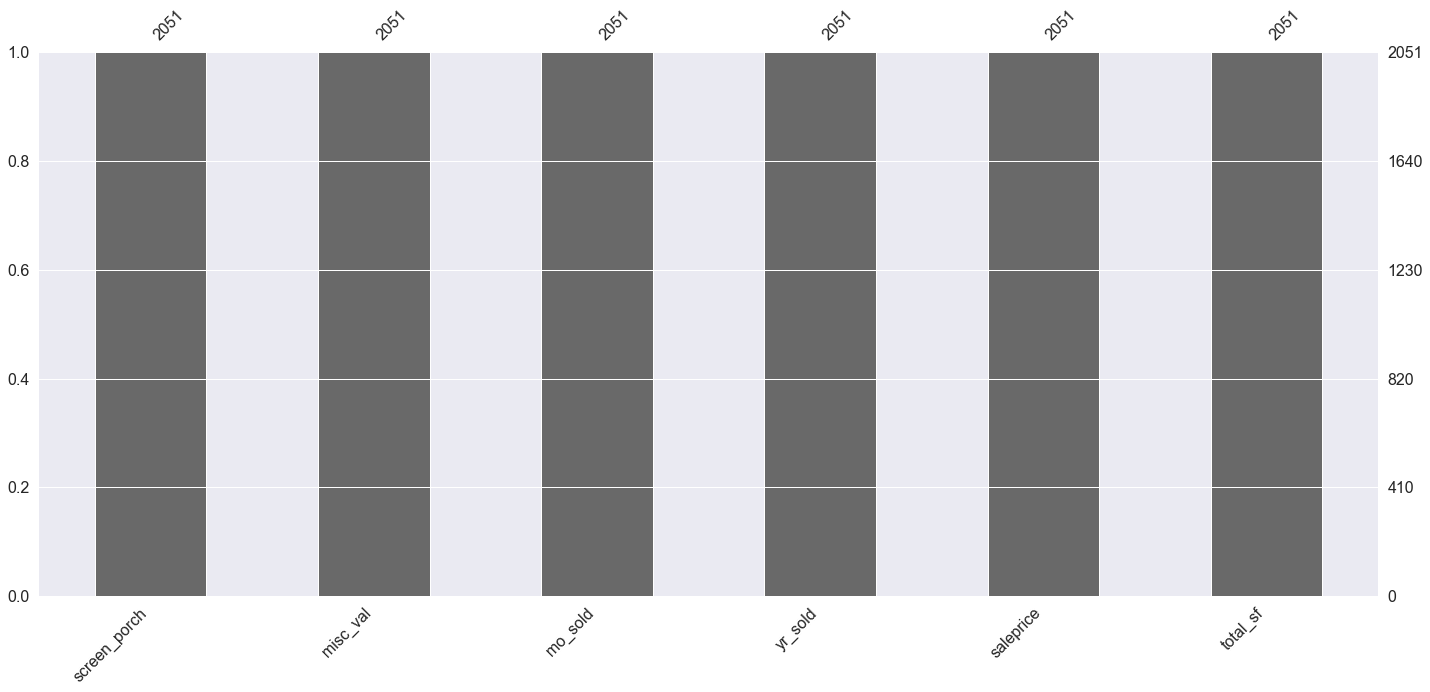

In [72]:
msno.bar(ames_numeric);

In [74]:
def fill_na_mean(df):
    #Cleans float and integer NaNs by replacing with mean
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            df[item].fillna(df[item].mean(), inplace = True)

In [75]:
fill_na_mean(ames_numeric);

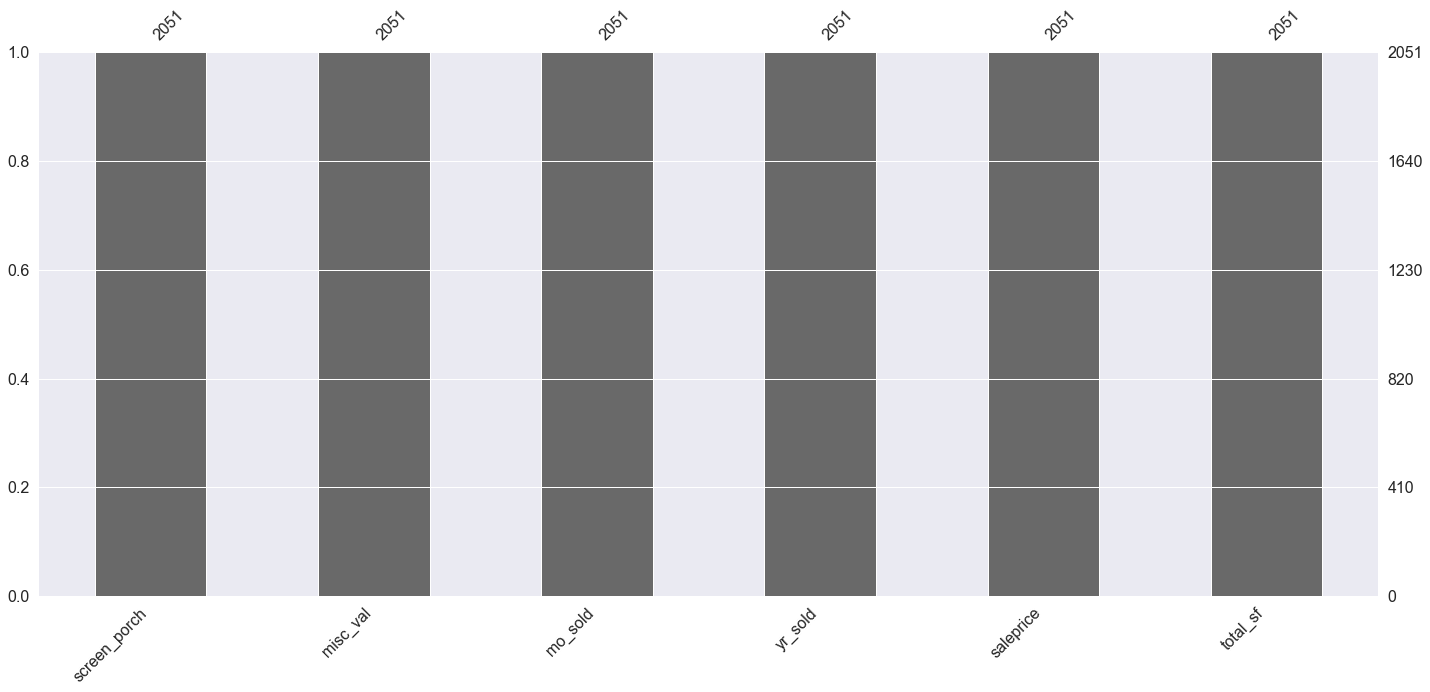

In [76]:
msno.bar(ames_numeric);

# Save a Copy of DF to CSV

In [77]:
ames_numeric.to_csv('ames_3_train_clean.csv')

### Instantiate Linear Regression

In [78]:
ames_numeric.columns

Index(['screen_porch', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice',
       'total_sf'],
      dtype='object')

In [79]:
features = ['totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'misc_val', 'mo_sold', 'yr_sold',
       'total_sf']

### Assemble X and y variables

In [82]:
ames_test.shape

(878, 12)

In [85]:
ames.shape

(2051, 6)

In [80]:
X = ames_numeric[features]
y = ames_numeric['saleprice']
X_final_test = ames_test

KeyError: "['enclosed_porch', 'totrms_abvgrd', 'wood_deck_sf', 'garage_yr_blt', 'fireplaces', 'garage_cars', 'open_porch_sf', '3ssn_porch'] not in index"

Split the Dataframe into training and testing sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

NameError: name 'X' is not defined

Scale

In [1]:
#Scaling Data and relabeling scaled data to "Z"
ss = StandardScaler()
ss.fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

ames_Z_test = ss.transform(ames_test)

NameError: name 'StandardScaler' is not defined

In [48]:
Z_train.shape, Z_test.shape

((1640, 13), (411, 13))

Instantiate the OLS Linear Regression model


In [49]:
lr = LinearRegression()

Fit the OLS Linear Regression Model

In [50]:
lr.fit(Z_train, y_train)

LinearRegression()

Score the OLS Linear Regression Model

In [51]:
print(f'OLS R2 train: {lr.score(Z_train, y_train)}')
print(f'OLS R2 test: {lr.score(Z_test, y_test)}')

OLS R2 train: 0.7413367988074402
OLS R2 test: 0.6927861231132639


In [52]:
# These scores seem fairly good. Could use some improving. Need a better interpretation. 

In [53]:
#Instantiate Ridge
ridge_model = Ridge(alpha = 72) # 72 seems to be the best alpha I can produce with ridge. 

# Fit Ridge
ridge_model.fit(Z_train, y_train)

#Evaluate model using R2
print(f'Ridge R2 Train: {ridge_model.score(Z_train, y_train)}')
print(f'Ridge R2 Test: {ridge_model.score(Z_test, y_test)}')

Ridge R2 Train: 0.740505538773417
Ridge R2 Test: 0.6996969803296708


In [54]:
#set up a list of lasso alphas to check
l_alphas = np.logspace(-3, 0, 100)

lasso = LassoCV(alphas = l_alphas, cv = 5, max_iter = 10000)
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=10000)

Check optimum value of alpha

In [65]:
lasso.alpha_

1.0

In [56]:
print(f'Lasso R2 Train: {lasso.score(Z_train, y_train)}')
print(f'Lasso R2 Test: {lasso.score(Z_test, y_test)}')

Lasso R2 Train: 0.7413367969752189
Lasso R2 Test: 0.6927790460183596


Check Model Weights

In [57]:
lr.intercept_

180799.38658536604

In [58]:
lr.coef_

array([-1109.90264196,  9604.71620847, 15930.34476261, 16238.67497183,
        4358.02401844,  3443.3327    ,  -613.369706  ,  1062.44867144,
        4255.12936658,  -651.29301257,   620.1467645 ,  -673.9301582 ,
       41620.23711878])

##### Create Preds

In [59]:
y_test_pred = lr.predict(Z_test).round(0)
y_test_pred

array([322179.,  64364., 221503.,  94265., 226314., 156356., 254570.,
       193071., 119779., 290594., 214081., 231594., 319398., 371275.,
       273649., 168878., 246617., 248320., 204812., 218174., 199533.,
       193900., 206049., 161871., 167500., 241040., 196469., 155852.,
       193574., 118897., 154764., 172907., 110969.,  95771., 158372.,
       302506., 105212., 148399., 256333.,  69525., 204045., 158302.,
        88713., 131463., 147281.,  72381., 237438., 292406., 657612.,
       161238., 283053., 219287., 113776., 168765., 208655., 296144.,
       102416., 222004., 260780., 266161., 204299., 102054., 175442.,
       190558., 179952., 124942., 291370.,  68321., 174825., 246350.,
       251465., 297180., 119815., 287798., 216531., 104554., 140104.,
       111375., 131972., 207091., 120778., 167805., 187215., 206775.,
        87190., 109132., 121890., 305234., 334779., 107902., 157528.,
       178603., 135168., 142521., 135446., 133222., 158208.,  85072.,
       164426., 3109

In [61]:
# Null residuals
null_resids = y - null_pred
null_resids

0       -50969.701609
1        38530.298391
2       -72469.701609
3        -7469.701609
4       -42969.701609
            ...      
2046    117281.298391
2047    -98969.701609
2048     -4469.701609
2049    -37469.701609
2050      7530.298391
Name: saleprice, Length: 2051, dtype: float64

#### Null Scoring

In [62]:
# null SSE / Total Variance
null_sse = (null_resids ** 2).sum()
null_sse

12877966918785.385

Test Scoring (Calculate RMSE)
the square root of the variance of the residuals. It indicates the absolute fit of the model to the data-how close the observed data points are to the model's predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. It can be interpreted as the standard devation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values indicate better fit. RMSE is a good measure of how accurately the model predicts the response. It is the most important criterion for fit if the main purpose of the model is prediction. 

In [63]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

43515.28607545526

ames_test

In [64]:
final_test_pred = lr.predict(ames_test)

ValueError: could not convert string to float: 'RM'

In [340]:
ames_test['SalePrice'] = y_test_pred

ValueError: Length of values does not match length of index

In [ ]:
ames_test